# Convolutional Neural Network to classify MNIST digits

We implement a Convolutional Neural Network to classify MNIST digits based on [LeNet](http://deeplearning.net/tutorial/lenet.html).

## Setup imports

In [1]:
from __future__ import division, print_function
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn import datasets
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using Theano backend.


## Download data

In [2]:
dataset = datasets.fetch_mldata("MNIST Original")
X = dataset.data
X = X.reshape((X.shape[0], 28, 28))
X = X[:, np.newaxis, :, :]    # add channel
X = X / 255.0
Y = np_utils.to_categorical(dataset.target.astype("int"), 10)

## Split into training and test

In [3]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=0)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(49000, 1, 28, 28) (21000, 1, 28, 28) (49000, 10) (21000, 10)


## Setup Model

In [4]:
model = Sequential()
# first convolutional layer
model.add(Convolution2D(20, 5, 5, border_mode="same", input_shape=(1, 28, 28)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# second convolution layer
model.add(Convolution2D(50, 5, 5, border_mode="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# first fully connected layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
# second fully connected layer + softmax
model.add(Dense(10))
model.add(Activation("softmax"))

optimizer = SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer=optimizer,
             metrics=["accuracy"])

## Train Model

In [5]:
# customized callback
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get("loss"))

In [6]:
history = LossHistory()
model.fit(Xtrain, Ytrain, batch_size=128, nb_epoch=10, 
          validation_data=(Xtest, Ytest), callbacks=[history])

Train on 49000 samples, validate on 21000 samples
Epoch 1/10
49000/49000 [==============================] - 103s - loss: 1.0586 - acc: 0.7099 - val_loss: 0.3404 - val_acc: 0.9006
Epoch 2/10
49000/49000 [==============================] - 104s - loss: 0.2863 - acc: 0.9151 - val_loss: 0.2365 - val_acc: 0.9309
Epoch 3/10
49000/49000 [==============================] - 103s - loss: 0.2016 - acc: 0.9401 - val_loss: 0.1796 - val_acc: 0.9457
Epoch 4/10
49000/49000 [==============================] - 103s - loss: 0.1591 - acc: 0.9522 - val_loss: 0.1526 - val_acc: 0.9544
Epoch 5/10
49000/49000 [==============================] - 103s - loss: 0.1322 - acc: 0.9607 - val_loss: 0.1305 - val_acc: 0.9600
Epoch 6/10
49000/49000 [==============================] - 103s - loss: 0.1132 - acc: 0.9670 - val_loss: 0.1101 - val_acc: 0.9676
Epoch 7/10
49000/49000 [==============================] - 103s - loss: 0.0996 - acc: 0.9706 - val_loss: 0.1035 - val_acc: 0.9692
Epoch 8/10
49000/49000 [=======================

## Evaluate Model

In [7]:
loss = model.evaluate(Xtest, Ytest, batch_size=128)
print("loss on test set: %.3f, accuracy: %.3f" % (loss[0], loss[1]))

20992/21000 [============================>.] - ETA: 0sloss on test set: 0.081, accuracy: 0.976


## Plot Loss

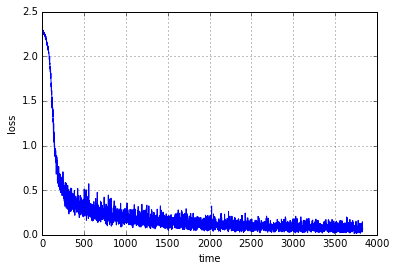

In [8]:
plt.plot(range(len(history.losses)), history.losses)
plt.xlabel("time")
plt.ylabel("loss")
plt.grid()
plt.show()

## Make some Random Predictions

[4 9 5 2 3 1 0 0 7 2]


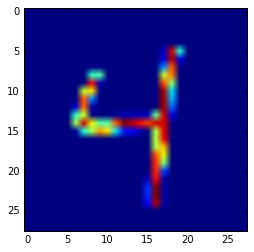

Predicted class: 4


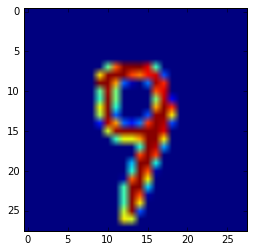

Predicted class: 9


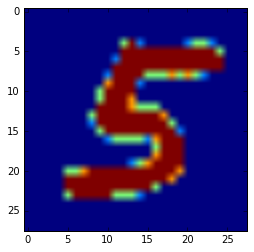

Predicted class: 5


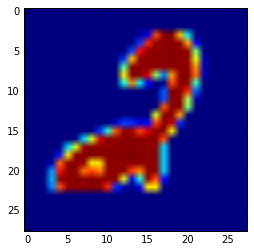

Predicted class: 2


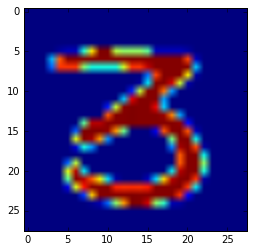

Predicted class: 3


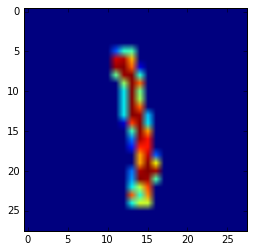

Predicted class: 1


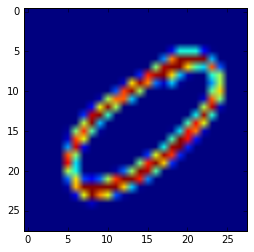

Predicted class: 0


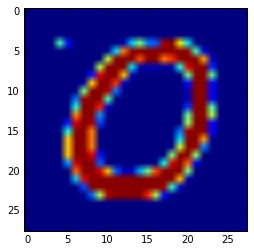

Predicted class: 0


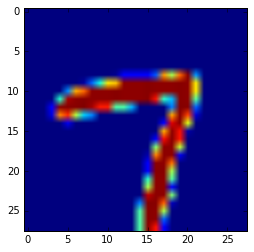

Predicted class: 7


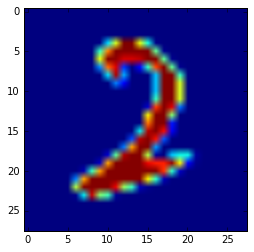

Predicted class: 2


In [9]:
Xtests = np.zeros((10, 1, 28, 28))
for idx, i in enumerate(np.random.randint(0, Xtest.shape[0], 10)):
    Xtests[idx] = Xtest[i, 0]

Y_ = model.predict(Xtests)
y_ = np_utils.categorical_probas_to_classes(Y_)
print(y_)

for i in range(10):
    img = Xtests[i, 0]
    plt.imshow(img)
    plt.show()
    print("Predicted class: %d" % (y_[i]))